In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DataSet import *

import sys
sys.path.append("..")
import TargetApplicationScope

%matplotlib notebook

In [2]:
data_set = generate_dataset("base_test_data.csv")

GENERATING COORDINATES DATA
GENERATING ELEVATION/ALTITUDE DATA
[1394.5, 583.0, 75.0, 240.0, 400.0, 1433.0, 415.0, 664.0, 882.0, 422.5, 456.0, 63.0, 1829.5, 267.0, 16.0, 683.0, 0.0, 1023.5, 691.0, 217.0, 27.0, 48.0, 10.0, 0.0, 526.0, 487.0, 95.0, 452.0, 469.5, 2563.0, 3.0, 403.0, 94.0, 79.0, 548.0, 119.0, 2573.5, 605.0, 1048.0, 0.0, 82.0, 580.0, 485.0, 781.0, 466.0, 0.0, 715.0, 733.0, 360.5, 69.0, 93.0, 199.5, 953.0, 0.0, 73.5, 1734.5, 131.0, 887.0, 0.0, 516.0, 17.0, 211.0, 1181.5, 57.0, 464.0, 417.0, 745.0, 46.0, 758.5, 66.0, 273.5, 684.0, 619.0, 595.5, 79.0, 391.0, 84.0, 183.0, 97.0, 1234.0, 422.0, 2191.0, 28.0, 186.5, 14.0, 280.0, 288.5, 0.0, 23.0, 38.0, 331.0, 249.0, 72.0, 303.0, 2562.5, 24.0, 243.0, 5.0, 531.5, 35.0, 354.0, 66.0, 1229.0, 2369.5, 89.0, 79.0, 57.0, 69.0, 324.0, 2324.5, 759.5, 335.0, 0.0, 221.0, 376.0, 192.0, 140.0, 224.0, 375.0, 559.0, 2305.0, 92.0, 618.0, 71.0, 0.0, 1631.0, 1783.0, 425.0, 430.0, 1884.0, 548.5, 74.0, 8.0, 2289.5, 529.0, 337.0, 0.0, 231.0, 549.5, 23.0

In [4]:
t = TargetApplicationScope.TargetApplicationScope()
lookup_table = t.__dict__
appropriate_test_cases = 5

In [5]:
selected_sample = 600
chosen_idx = np.random.choice(selected_sample, replace=False, size=selected_sample)
df_trimmed = data_set.iloc[chosen_idx]
print(df_trimmed.describe())


            Width      Height      Roi.X1      Roi.Y1      Roi.X2      Roi.Y2  \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean    49.071667   49.840000    5.840000    5.845000   43.520000   44.263333   
std     20.835869   20.883197    1.174748    1.201408   19.892187   19.942254   
min     25.000000   26.000000    5.000000    5.000000   20.000000   20.000000   
25%     35.000000   36.000000    5.000000    5.000000   30.000000   31.000000   
50%     43.000000   44.000000    6.000000    6.000000   38.000000   38.000000   
75%     56.000000   57.000000    6.000000    6.000000   51.000000   51.250000   
max    158.000000  158.000000   14.000000   14.000000  145.000000  145.000000   

         ClassId    Latitude   Longitude  Altitude      Datetime       Speed  \
count  600.00000  600.000000  600.000000       0.0  6.000000e+02  600.000000   
mean     0.90000   50.351668    9.975614       NaN  1.505602e+09   65.073349   
std      0.30025    2.604052  

# Coverage/Sufficiency aspects

In [6]:
## Range related parameters: just checking min & max
def return_min_max(column):
    """ returns the max & min on column [min, max]"""
    return [min(column), max(column)]


def check_range(tas_parms, column, sufficency = 0 ):
    min_max = return_min_max(column)
    for key in tas_parms:
        if "min" in key:
            if tas_parms[key] <= min_max[0]:
                sufficency = sufficency + 0.5
        if "max" in key:
            if tas_parms[key] >= min_max[1]:
                sufficency = sufficency + 0.5
    return sufficency

In [7]:
def validate_range_based_parameters(data):
    """
     Range-based:
    + coordinateRange(coordinates, max_coordinate, min_coordinate)
    + temperatureRange(temperature, min_temp, max_temp):
    + yearRange(year, timestamp)
    + velocityRange(min_velocity, max_velocity)
    + rainSensorRange(min_rain, max_rain)
    """
    
    velocity_data = data['Speed']
    velocity_params = lookup_table['velocity']
    print(check_range(velocity_params, velocity_data ))

    temp_params = lookup_table['temperature']
    print(check_range(velocity_params, velocity_data ))

    time_params = lookup_table['available_years']
    return

validate_range_based_parameters(df_trimmed)

1.0
1.0


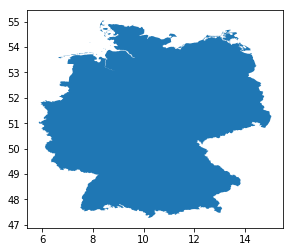

In [9]:
#arealarger than 4km^2, each hour of a day … with at least x cases
import geopandas as gpd
import shapely

Germany_map = gpd.read_file("shp/Germanyboundary87.shp")

Germany_map.plot()





In [16]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

df_trimmed['Coordinates_Points'] = list(zip(df_trimmed.Longitude, df_trimmed.Latitude))

df_trimmed['Coordinates_Points'] = df_trimmed['Coordinates_Points'].apply(Point)


gdf = geopandas.GeoDataFrame(df_trimmed, geometry='Coordinates')

germany_plot = gpd.read_file("shp/Germanyboundary87.shp")

ax = germany_plot.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='blue')
germany=plt.figure(figsize=(40, 100))
germany.show()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: Input geometry column must contain valid geometry objects.

<IPython.core.display.Javascript object>


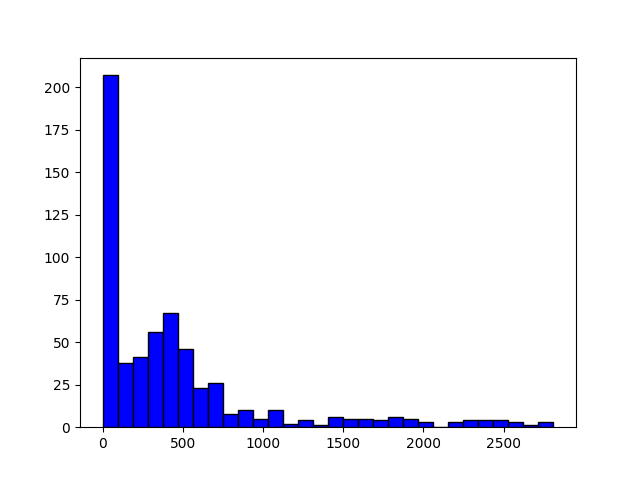

In [17]:
## Distribution -> https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
## Elevation of Germany 
plt.hist(df_trimmed['Elevation'], color = 'blue', edgecolor = 'black',
         bins = 30)
plt.title="Latitude"
plt.xlabel = "Latitude"

# Representativeness aspects

In [ ]:
## can use some of the Weather sampling code